In [1]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\SEM-4\\ML-Datasets\\BreastCancer.csv")

In [22]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

In [27]:
# Select top 5 most relevant features
selector = SelectKBest(f_classif, k=5)
y = data['diagnosis'].map({'M': 1, 'B': 0})
X = selector.fit_transform(data.drop(columns=['id', 'diagnosis','Unnamed: 32']), y)

In [28]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [29]:
print(y)
print("X:")
print(X)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
X:
[[1.228e+02 1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [1.329e+02 7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.300e+02 1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 ...
 [1.083e+02 5.302e-02 1.898e+01 1.267e+02 1.418e-01]
 [1.401e+02 1.520e-01 2.574e+01 1.846e+02 2.650e-01]
 [4.792e+01 0.000e+00 9.456e+00 5.916e+01 0.000e+00]]


In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print(X_train.shape)
print(X_test.shape)

(455, 5)
(114, 5)


In [33]:
X_train

array([[-1.36208497, -0.11914956, -1.23286131, -1.24792009,  0.9320124 ],
       [ 2.09167167,  2.66503199,  2.17331385,  2.08161691,  2.6989469 ],
       [-1.34520926, -0.69650228, -1.29528358, -1.24522047, -0.97023893],
       ...,
       [-0.06512547, -1.10551525, -0.27571985, -0.37984081, -1.23903365],
       [-0.03137406,  0.43005885,  0.16747826,  0.20387802,  1.05001236],
       [-0.60350155, -0.80434493, -0.60239639, -0.67559968, -0.61102866]])

In [34]:
log_model = LogisticRegression(max_iter = 1000,random_state=42)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [35]:
y_pred = log_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9736842105263158


In [37]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [38]:
conf_matrix

array([[69,  2],
       [ 1, 42]], dtype=int64)

In [39]:
report = classification_report(y_test,y_pred)

In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 1.0, 'Confusion Matrix')

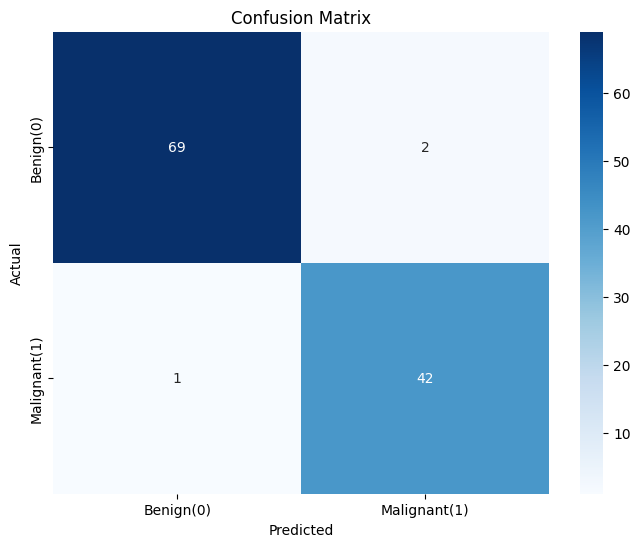

In [41]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap = "Blues",
xticklabels = ['Benign(0)', 'Malignant(1)'],yticklabels = ['Benign(0)','Malignant(1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

Analyzing Overfitting

In [43]:
# Accuracy on training data
train_preds = log_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.945054945054945


In [44]:
X_train_set, X_val, y_train_set, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# This gives: 60% train, 20% val, 20% test

# Train the model
log_model.fit(X_train_set, y_train_set)

LogisticRegression(max_iter=1000, random_state=42)

In [46]:
# Evaluate on validation
val_preds = log_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

# Tune hyperparameters if needed, then finally:
test_preds = log_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, test_preds))

Validation Accuracy: 0.9473684210526315
Final Test Accuracy: 0.9736842105263158
